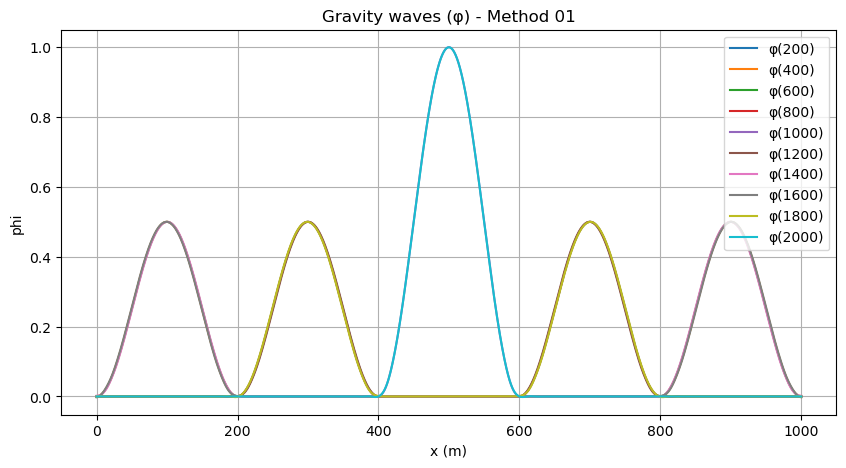

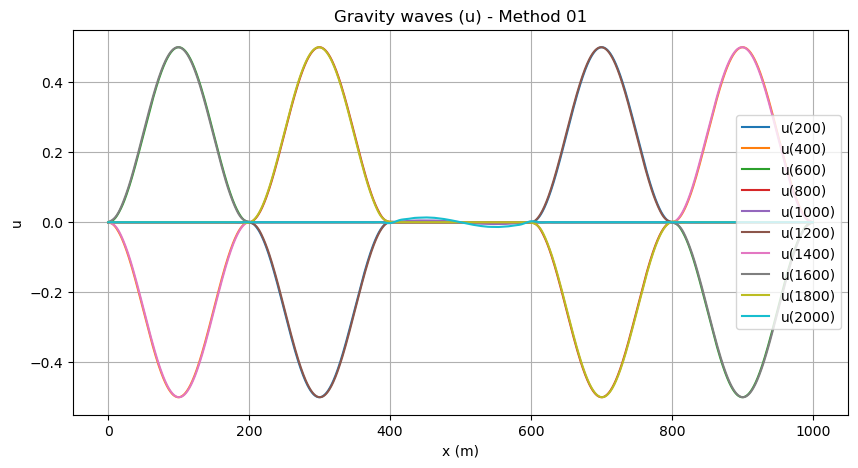

In [8]:
import numpy as np
import matplotlib.pyplot as plt


x0 = 0  
x1 = 1000  
dx = 0.5  
P = 1  
dt = 0.2  
t0 = 0  
t1 = 2000  
tp = 200  

nx = int((x1 - x0) / dx) + 1
x = np.linspace(x0, x1, nx)

def IC(x):
    if x < 400:
        return 0.0
    elif 400 <= x < 600:
        return (np.sin(((x - 400) / 200) * np.pi)**2)
    else:
        return 0.0

phi_o = np.array([IC(xi) for xi in x])
u_o= np.zeros(nx)

def u_ft(u_n, phi_n, dtdx):
    return u_n - 0.5 * dtdx * (np.roll(phi_n, -1) - np.roll(phi_n, 1))

def phi_ft(phi_n, u_n, c):
    return phi_n - 0.5 * c * (np.roll(u_n, -1) - np.roll(u_n, 1))

def ueq(u_o, phi_n, dtdx):
    return u_o - dtdx * (np.roll(phi_n, -1) - np.roll(phi_n, 1))

def peq(phi_o, u_n, c):
    return phi_o - c * (np.roll(u_n, -1) - np.roll(u_n, 1))

dtdx = dt / dx
c = np.sqrt(P) * dtdx


phi_n = phi_ft(phi_o, u_o, c)
u_n = u_ft(u_o, phi_o, dtdx)

phi_hist = []
u_hist = []
t_hist = []


t = t0
while t < t1:
    u_n1 = ueq(u_o, phi_n, dtdx)
    phi_n1 = peq(phi_o, u_n, c)

    phi_o = np.copy(phi_n)
    phi_n = np.copy(phi_n1)
    u_o = np.copy(u_n)
    u_n = np.copy(u_n1)

    t = t + dt

    if t % tp < dt:
        phi_hist.append(np.copy(phi_n))
        u_hist.append(np.copy(u_n))
        t_hist.append(t)


plt.figure(figsize=(10, 5))
for i, phi in enumerate(phi_hist):
    plt.plot(x, phi, label=f'φ({t_hist[i]:.0f})')
plt.xlabel('x (m)')
plt.ylabel('phi')
plt.title('Gravity waves (φ) - Method 01')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
for i, u in enumerate(u_hist):
    plt.plot(x, u, label=f'u({t_hist[i]:.0f})')
plt.xlabel('x (m)')
plt.ylabel('u')
plt.title('Gravity waves (u) - Method 01')
plt.legend()
plt.grid()
plt.show()


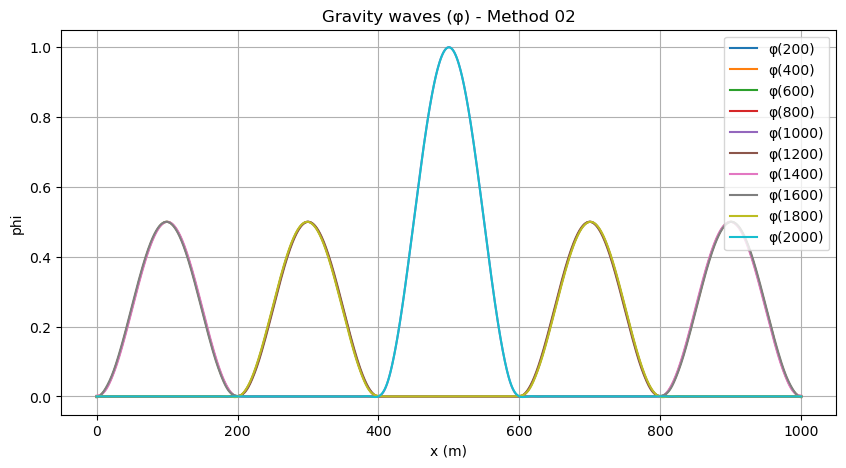

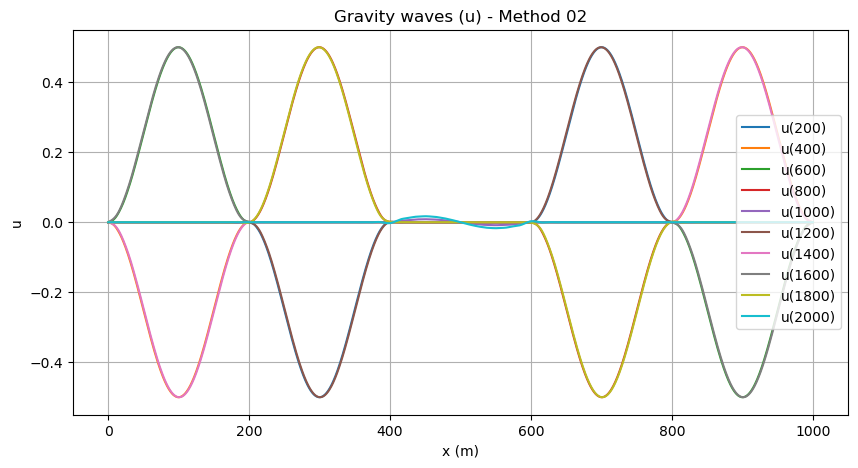

In [10]:
import numpy as np
import matplotlib.pyplot as plt


x0 = 0  
x1 = 1000  
dx = 0.5  
P = 1  
dt = 0.2 
t0 = 0  
t1 = 2000  
tp = 200  

nx = int((x1 - x0) / dx) + 1
x = np.linspace(x0, x1, nx)

def IC(x):
    if x < 400:
        return 0.0
    elif 400 <= x < 600:
        return (np.sin(((x - 400) / 200) * np.pi)**2)
    else:
        return 0.0

phi_o = np.array([IC(xi) for xi in x])
u_o = np.zeros(nx)

def u_fo(u_n, phi_n, dtdx):
    return u_n - 0.5 * dtdx * (np.roll(phi_n, -1) - np.roll(phi_n, 1))

def phi_fo(phi_n, u_n1, c):
    return phi_n - c * 0.5 * (np.roll(u_n1, -1) - np.roll(u_n1, 1))

dtdx = dt / dx
c = np.sqrt(P) * dtdx

u_n = np.copy(u_o)
phi_n = np.copy(phi_o)

phi_hist = []
u_hist = []
t_hist = []

t = t0
while t < t1:
    u_n1 = u_fo(u_n, phi_n, dtdx)
    phi_n1 = phi_fo(phi_n, u_n1, c)

    phi_n = np.copy(phi_n1)
    u_n = np.copy(u_n1)

    t = t + dt

    if t % tp < dt:
        phi_hist.append(np.copy(phi_n))
        u_hist.append(np.copy(u_n))
        t_hist.append(t)

plt.figure(figsize=(10, 5))
for i, phi in enumerate(phi_hist):
    plt.plot(x, phi, label=f'φ({t_hist[i]:.0f})')
plt.xlabel('x (m)')
plt.ylabel('phi')
plt.title('Gravity waves (φ) - Method 02')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
for i, u in enumerate(u_hist):
    plt.plot(x, u, label=f'u({t_hist[i]:.0f})')
plt.xlabel('x (m)')
plt.ylabel('u')
plt.title('Gravity waves (u) - Method 02')
plt.legend()
plt.grid()
plt.show()


First Graph: ϕ(x,t) vs time

We start with ϕ(x) is zero everywhere except in the range 400≤x<600, where it follows a sinusoidal squared shape.
Over time, the wave moves both sides symmetrically with the half of the amplitude, thus 0.5. This represents a propagating wave moving through the system, similar to how disturbances in a fluid or atmospheric pressure waves behave.

Second Graph: u(x,t) vs time

Firstly, u(x) is zero everywhere.
As ϕ(x) propagates, it induces motion in u(x), which acts like a velocity field. This velocity field oscillates in response to the changes in ϕ(x), creating alternating positive and negative waves. Between 400 and 600 is non zero because the key term here is ∂ϕ/∂x, Since ϕ(x) has a smooth increase and decrease only in the range 400–600 m, its derivative is nonzero only in this range. This behavior is similar to how wind responds to pressure variations in atmospheric physics.

